In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 主成分分析可以降维
import numpy as np
from sklearn.cluster import KMeans

In [26]:
# 读取数据
data = np.loadtxt('20.csv',delimiter=',',usecols=(1,2,3,4,5,6),unpack=True)    #（以成绩单为例：2列为班级，4-9列分别为语文-生物成绩）  
data = data.transpose()    #将按列（科目）组织的数组转置为按行（学生）组织的数组  

In [36]:
lis = []
with open('20.csv', 'r') as f1:
    list1 = [f1.readlines()]
    lis.append(list1)
lis_ = np.array(lis)     
print(lis_)

[[['USA,631.6,161.9,0.36,403,26073,35.34\n'
   'Japan,498.4,143.2,3.57,176,10223,6.26\n'
   'German,557.6,70.6,2.18,199,11571,9.48\n'
   'Sweden,684.1,281.8,1.4,286,16660,29.39\n'
   'Switzer,644,93.5,1.98,234,13621,22.68\n'
   'Denmark,620.3,248.6,2.56,296,17210,21.84\n'
   'Singapo,498.4,147.5,2.5,284,13578,13.49\n'
   'Taiwan,469.4,56.1,3.68,119,6911,1.72\n'
   'Korea,434.5,73,3.36,99,5795,1.66\n'
   'Brazil,81.9,16.3,3.02,19,876,0.52\n'
   'Chile,138.6,8.2,1.4,31,1411,1.28\n'
   'Mexico,92.2,9.8,2.61,31,1751,0.35\n'
   'Russian,174.9,5,5.12,24,1101,0.48\n'
   'Porland,169,6.5,3.68,40,1796,1.45\n'
   'Hungary,262.2,49.4,2.66,68,3067,3.09\n'
   'Malasia,195.5,88.4,4.19,53,2734,1.25\n'
   'Tailand,78.6,27.8,4.95,22,1662,0.11\n'
   'Indian,13.6,0.3,6.28,2,101,0.01\n'
   'France,559.1,42.9,1.27,201,11702,4.76\n'
   'British,521.1,122.5,0.98,248,14461,11.91\n']]]


In [11]:
#逐行将读到的文件存入python的列表  并将python列表转化为ndarray 
date_PyList=[]  
for one_line in data:  
    date_PyList.append(one_line)    
X = np.array(date_PyList)     

In [12]:
# 降维操作一波就好
#调用sklearn中的PCA，其中主成分有5列
pca_sk = PCA(n_components=2)
#利用PCA进行降维，数据存在X_new中
X_new = pca_sk.fit_transform(X)
print(X_new)

[[ 1.79599871e+04  2.53917152e+02]
 [ 2.11142753e+03 -7.70780649e+01]
 [ 3.46006394e+03 -8.67790172e+01]
 [ 8.55304672e+03 -9.08882398e+01]
 [ 5.51212623e+03 -1.15299946e+02]
 [ 9.10077879e+03 -7.49943138e+00]
 [ 5.46631109e+03  1.74027318e+01]
 [-1.20119940e+03 -1.33636440e+02]
 [-2.31772255e+03 -1.33828455e+02]
 [-7.24569839e+03  7.86465356e+01]
 [-6.70927363e+03  3.90681758e+01]
 [-6.37077248e+03  9.50015973e+01]
 [-7.01821053e+03 -5.37400848e+00]
 [-6.32350156e+03  2.03139803e+01]
 [-5.04974947e+03 -4.07609925e+01]
 [-5.38435005e+03  1.09172590e+01]
 [-6.46009482e+03  1.03930835e+02]
 [-8.02260983e+03  1.25907524e+02]
 [ 3.59081094e+03 -8.08527617e+01]
 [ 6.34863036e+03  2.68915661e+01]]


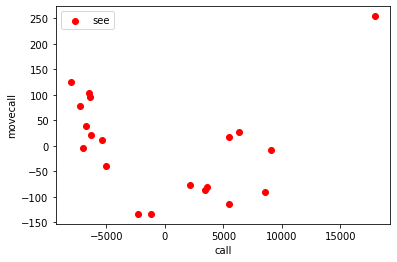

In [17]:
#绘制数据分布图
plt.scatter(X_new[:, 0], X_new[:, 1], c = "red", marker='o', label='see')
plt.xlabel('call')
plt.ylabel('movecall')  # 对两个特征分类
plt.legend(loc=2)  # 图例在图中的地理位置
plt.show()

In [22]:
estimator = KMeans(n_clusters = 2)  #构造聚类器，假设要聚的类别为3个，也就是设定K=3
estimator.fit(X_new)#聚类
label_pred = estimator.labels_  #获取聚类标签

In [25]:
data

array([[6.3160e+02, 1.6190e+02, 3.6000e-01, 4.0300e+02, 2.6073e+04,
        3.5340e+01],
       [4.9840e+02, 1.4320e+02, 3.5700e+00, 1.7600e+02, 1.0223e+04,
        6.2600e+00],
       [5.5760e+02, 7.0600e+01, 2.1800e+00, 1.9900e+02, 1.1571e+04,
        9.4800e+00],
       [6.8410e+02, 2.8180e+02, 1.4000e+00, 2.8600e+02, 1.6660e+04,
        2.9390e+01],
       [6.4400e+02, 9.3500e+01, 1.9800e+00, 2.3400e+02, 1.3621e+04,
        2.2680e+01],
       [6.2030e+02, 2.4860e+02, 2.5600e+00, 2.9600e+02, 1.7210e+04,
        2.1840e+01],
       [4.9840e+02, 1.4750e+02, 2.5000e+00, 2.8400e+02, 1.3578e+04,
        1.3490e+01],
       [4.6940e+02, 5.6100e+01, 3.6800e+00, 1.1900e+02, 6.9110e+03,
        1.7200e+00],
       [4.3450e+02, 7.3000e+01, 3.3600e+00, 9.9000e+01, 5.7950e+03,
        1.6600e+00],
       [8.1900e+01, 1.6300e+01, 3.0200e+00, 1.9000e+01, 8.7600e+02,
        5.2000e-01],
       [1.3860e+02, 8.2000e+00, 1.4000e+00, 3.1000e+01, 1.4110e+03,
        1.2800e+00],
       [9.2200e+01, 9

In [24]:
X_new[label_pred]

array([[ 2111.42752724,   -77.07806491],
       [ 2111.42752724,   -77.07806491],
       [ 2111.42752724,   -77.07806491],
       [ 2111.42752724,   -77.07806491],
       [ 2111.42752724,   -77.07806491],
       [ 2111.42752724,   -77.07806491],
       [ 2111.42752724,   -77.07806491],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [17959.98712702,   253.91715191],
       [ 2111.42752724,   -77.07806491],
       [ 2111.42752724,   -77.07806491]])

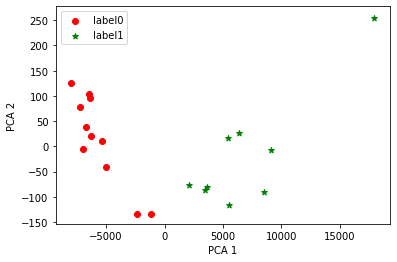

In [20]:
#绘制k-means结果
x0 = X_new[label_pred == 0]  #分成零的
x1 = X_new[label_pred == 1]
x2 = X_new[label_pred == 2]
x3 = X_new[label_pred == 3]
x4 = X_new[label_pred == 4]
x5 = X_new[label_pred == 5]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
# plt.scatter(x2[:, 0], x2[:, 2], c = "blue", marker='v', label='label2')
# plt.scatter(x3[:, 0], x3[:, 2], c = "yellow", marker='<', label='label3')
# plt.scatter(x4[:, 0], x4[:, 2], c = "magenta", marker='>', label='label4')
# plt.scatter(x5[:, 0], x5[:, 2], c = "black", marker='.', label='label5')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc=2)
plt.show()

In [72]:
estimator =KMeans(n_clusters=3,init = 'k-means++')   #构造一个聚类数为5的聚类器,初始质心选取方式改为kmeans++
estimator.fit(X)   #聚类
label_pred = estimator.labels_  #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
print(label_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


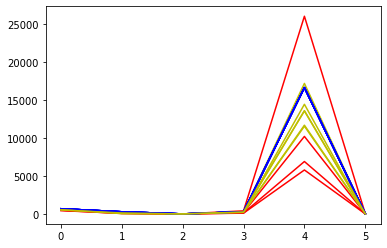

In [117]:
#画图，每个类别画出一条线
for  i in range(len(label_pred)):
    if label_pred[i] == 0:
        x = [i for i in range(len(X[1]))]
        plt.plot(x, X[i], 'y')
    elif label_pred[i] == 1:
        x = [i for i in range(len(X[1]))]
        plt.plot(x, X[3], 'b')
    else:
        x = [i for i in range(len(X[1]))]
        plt.plot(x, X[i], 'r')